In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

points = {'A1': np.array([2, 10]), 'A2': np.array([2, 5]), 'A3': np.array([8, 4]),
          'A4': np.array([5, 8]), 'A5': np.array([7, 5]), 'A6': np.array([6, 4]),
          'A7': np.array([1, 2]), 'A8': np.array([4, 9])}
initial_centers = {'Cluster1': points['A2'], 'Cluster2': points['A3'], 'Cluster3': points['A8']}

In [3]:
# Function to assign points to the nearest center
def assign_points_to_clusters(points, centers):
    clusters = {key: [] for key in centers}
    for point_name, point in points.items():
        nearest_center = min(centers, key=lambda center: np.linalg.norm(point - centers[center]))
        clusters[nearest_center].append(point_name)
    return clusters

# Function to update centers based on the points in each cluster
def update_centers(points, clusters):
    new_centers = {}
    for cluster, point_names in clusters.items():
        cluster_points = np.array([points[name] for name in point_names])
        new_centers[cluster] = np.mean(cluster_points, axis=0) if len(cluster_points) > 0 else np.array([0, 0])
    return new_centers

# Assign points to clusters for the first epoch
clusters_after_first_epoch = assign_points_to_clusters(points, initial_centers)
# Update centers after the first epoch
new_centers_after_first_epoch = update_centers(points, clusters_after_first_epoch)

# Iterate until convergence
def kmeans_convergence(points, initial_centers):
    previous_centers = initial_centers
    iterations = 0
    while True:
        clusters = assign_points_to_clusters(points, previous_centers)
        new_centers = update_centers(points, clusters)
        iterations += 1
        if np.all([np.array_equal(previous_centers[center], new_centers[center]) for center in previous_centers]):
            break
        previous_centers = new_centers
    return iterations, clusters, new_centers

iterations_needed, final_clusters, final_centers = kmeans_convergence(points, initial_centers)

iterations_needed, final_clusters, final_centers

(2,
 {'Cluster1': ['A2', 'A7'],
  'Cluster2': ['A3', 'A5', 'A6'],
  'Cluster3': ['A1', 'A4', 'A8']},
 {'Cluster1': array([1.5, 3.5]),
  'Cluster2': array([7.        , 4.33333333]),
  'Cluster3': array([3.66666667, 9.        ])})

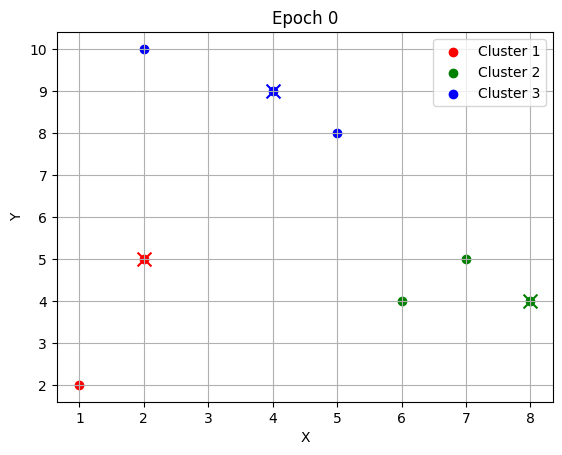

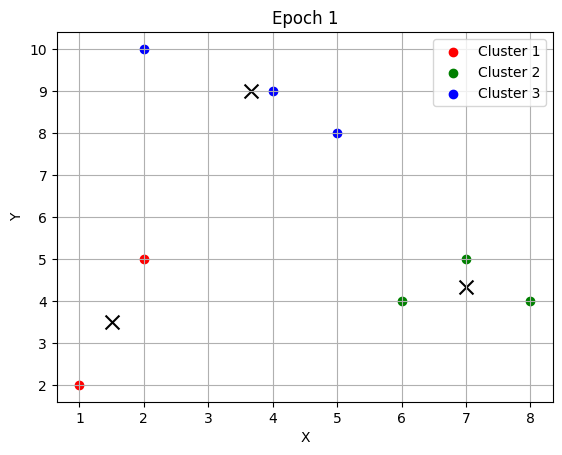

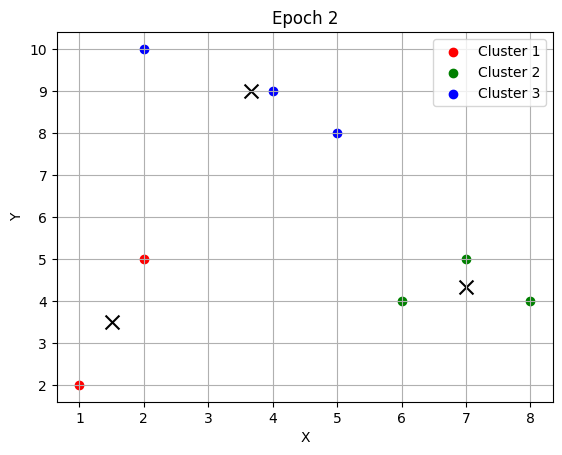

In [8]:
# Function to plot clusters
def plot_clusters(points, centers, clusters, epoch):
    colors = ['r', 'g', 'b']
    fig, ax = plt.subplots()
    for i, (cluster, point_names) in enumerate(clusters.items()):
        cluster_points = np.array([points[name] for name in point_names])
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')
        # Plot initial centers for the first epoch
        if epoch == 0:
            ax.scatter(centers[cluster][0], centers[cluster][1], c=colors[i], marker='x', s=100)
        # Plot updated centers for subsequent epochs
        else:
            ax.scatter(centers[cluster][0], centers[cluster][1], c='black', marker='x', s=100)
    ax.legend()
    ax.grid(True)
    ax.set_title(f'Epoch {epoch}')
    plt.xlabel('X')
    plt.ylabel('Y')
    return fig

# Initial assignment
clusters_after_first_epoch = assign_points_to_clusters(points, initial_centers)

# Visualize each epoch
centers = initial_centers
for epoch in range(iterations_needed + 1):
    if epoch > 0:  # Update centers and clusters for epochs after the initial
        clusters = assign_points_to_clusters(points, centers)
        centers = update_centers(points, clusters)
    plot_clusters(points, centers, clusters, epoch)

In [9]:
import numpy as np
from collections import defaultdict

# Given data points
points = {'A1': np.array([2, 10]), 'A2': np.array([2, 5]), 'A3': np.array([8, 4]),
          'A4': np.array([5, 8]), 'A5': np.array([7, 5]), 'A6': np.array([6, 4]),
          'A7': np.array([1, 2]), 'A8': np.array([4, 9])}

# Threshold value
threshold = 4

# Nearest Neighbor clustering function
def NN_clustering(points, threshold):
    clusters = defaultdict(list)
    cluster_idx = 0

    for point_name, point in points.items():
        # Check if point can be added to an existing cluster
        added = False
        for cluster, members in clusters.items():
            for member in members:
                if np.linalg.norm(point - points[member]) <= threshold:
                    clusters[cluster].append(point_name)
                    added = True
                    break
            if added:
                break

        # If not added to any cluster, create a new cluster
        if not added:
            clusters[cluster_idx].append(point_name)
            cluster_idx += 1

    # Converting defaultdict to dict for output
    return dict(clusters)

# Perform NN clustering
nn_clusters = NN_clustering(points, threshold)

# Printing clusters for visual inspection before plotting
nn_clusters

{0: ['A1', 'A4', 'A5', 'A6', 'A8'], 1: ['A2', 'A7'], 2: ['A3']}

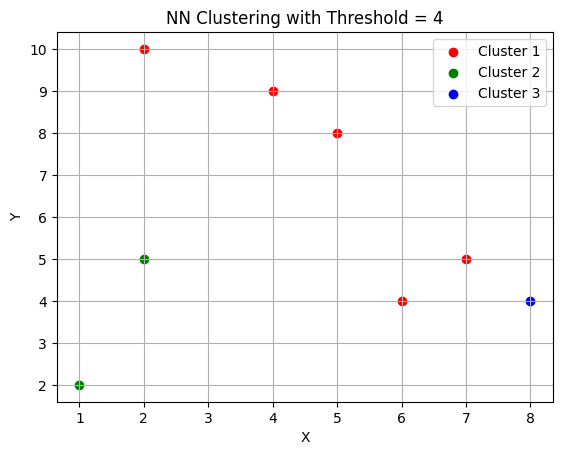

In [10]:
import matplotlib.pyplot as plt

# Convert cluster dictionary to a format suitable for plotting
def convert_clusters_for_plotting(clusters, points):
    plot_data = defaultdict(list)
    for cluster_id, members in clusters.items():
        for member in members:
            plot_data[cluster_id].append(points[member])
    return plot_data

# Convert clusters for plotting
plot_clusters = convert_clusters_for_plotting(nn_clusters, points)

# Plotting
fig, ax = plt.subplots()
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for cluster_id, cluster_points in plot_clusters.items():
    cluster_points = np.array(cluster_points)
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[cluster_id], label=f'Cluster {cluster_id+1}')

ax.legend()
ax.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('NN Clustering with Threshold = 4')
plt.show()

In [11]:
# Q9: The results obtained from Nearest Neighbor (NN) clustering are not the same as those obtained from the K-Means algorithm.
# K-Means clustering results depend on the initial choice of cluster centers and aim to minimize the variance within each cluster
# through iterative refinement of cluster centers. In contrast, NN clustering groups points based solely on their proximity to each other,
# defined by a fixed distance threshold, without iteratively updating cluster centers.

# Q10: The final plot for NN clustering was provided, showing the distribution of points into three clusters based on the proximity threshold of 4.
# This visualization demonstrates how points are grouped together when they fall within the specified Euclidean distance from each other.

# Q11: Comparing the performance of K-means and Nearest Neighbor clustering algorithms:
# K-Means is efficient for large datasets and aims to create compact clusters by minimizing the variance within each cluster.
# It requires specifying the number of clusters beforehand and is sensitive to the initial choice of cluster centers. For bigger datasets,
# its computational cost can become significant due to the need for multiple iterations of distance calculation and center updating.

# Nearest Neighbor Clustering is straightforward, grouping points based on a fixed distance threshold without requiring the specification of the
# number of clusters. However, it can result in variable cluster sizes and does not necessarily minimize within-cluster variance. Its performance
# degrades on larger datasets due to the exhaustive calculation of distances between all pairs of points, making it computationally expensive
# without the use of advanced indexing techniques.

# Disadvantages on bigger datasets:

# K-Means may become computationally expensive as it requires iterative recalculations of distances and cluster centers, particularly for very
# large datasets. Its effectiveness is also dependent on the initial center selection, potentially leading to suboptimal clustering with certain
# datasets.

# Nearest Neighbor Clustering faces scalability issues due to the need for exhaustive distance calculations, significantly increasing computational
# time and resources as the dataset size grows. It may also produce clusters of highly variable density and size, which might not be desirable for
# all applications.

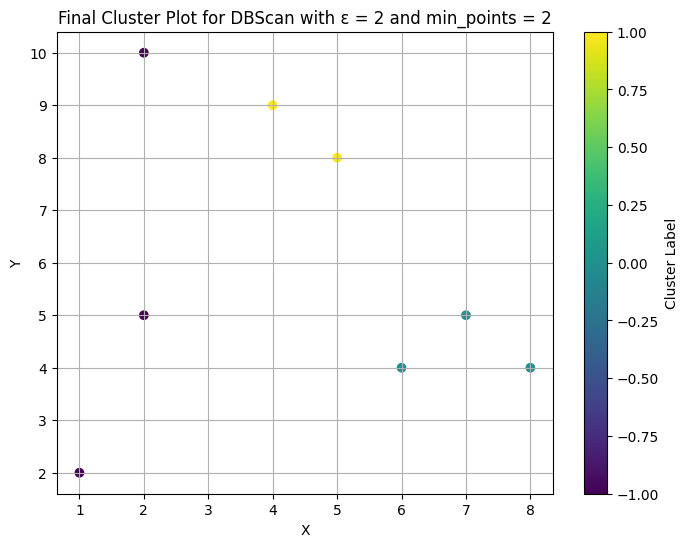

In [12]:
from sklearn.cluster import DBSCAN

# Define the dataset
points = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])

# Perform DBScan with epsilon = 2 and min_points = 2
dbscan = DBSCAN(eps=2, min_samples=2)
dbscan.fit(points)

# Plot the final cluster result
plt.figure(figsize=(8, 6))
plt.scatter(points[:, 0], points[:, 1], c=dbscan.labels_, cmap='viridis')
plt.title('Final Cluster Plot for DBScan with ε = 2 and min_points = 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

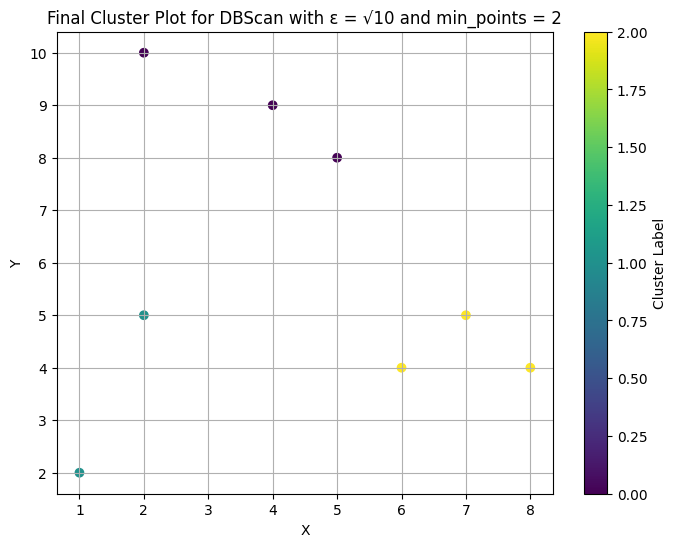

In [13]:
# Perform DBScan with epsilon = sqrt(10) and min_points = 2
dbscan_sqrt10 = DBSCAN(eps=np.sqrt(10), min_samples=2)
dbscan_sqrt10.fit(points)

# Plot the final cluster result
plt.figure(figsize=(8, 6))
plt.scatter(points[:, 0], points[:, 1], c=dbscan_sqrt10.labels_, cmap='viridis')
plt.title('Final Cluster Plot for DBScan with ε = √10 and min_points = 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()


In [14]:
# Load the dataset
url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv'
data = pd.read_csv(url)

# Preprocess: Extract 'sbp', 'tobacco', and 'chd'
X = data[['sbp', 'tobacco']].iloc[:300]  # Training features
y = data['chd'].iloc[:300]  # Training labels

# Fit K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [15]:
# Map clusters to CHD classes based on majority in training data
clusters_to_classes = {}
for i in range(2):
    cluster_indices = kmeans.labels_ == i
    majority_class = y[cluster_indices].mode()[0]
    clusters_to_classes[i] = majority_class

# Test data
X_test = data[['sbp', 'tobacco']].iloc[300:]
y_test_actual = data['chd'].iloc[300:]

# Predict clusters for test data
test_clusters = kmeans.predict(X_test)

# Map predicted clusters to CHD classes
y_test_predicted = [clusters_to_classes[cluster] for cluster in test_clusters]

# Calculate accuracy
accuracy = accuracy_score(y_test_actual, y_test_predicted)
print(f'Accuracy: {accuracy}')


Accuracy: 0.691358024691358


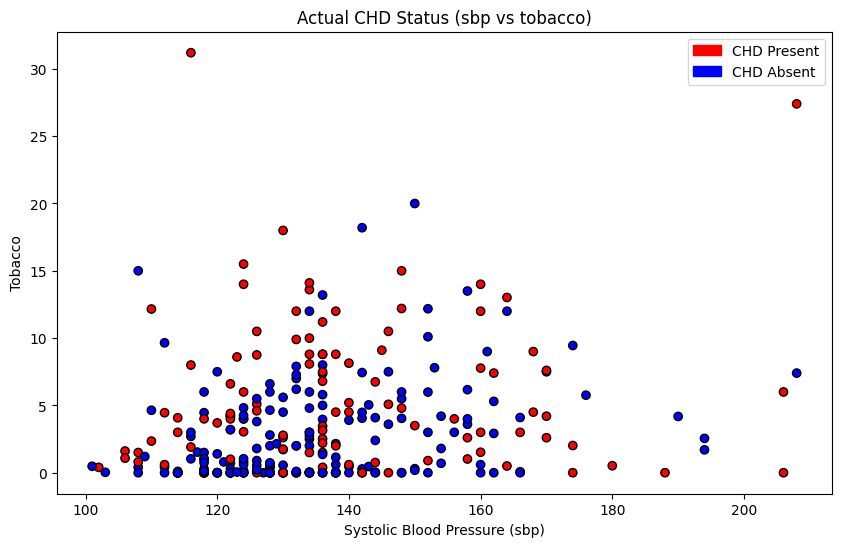

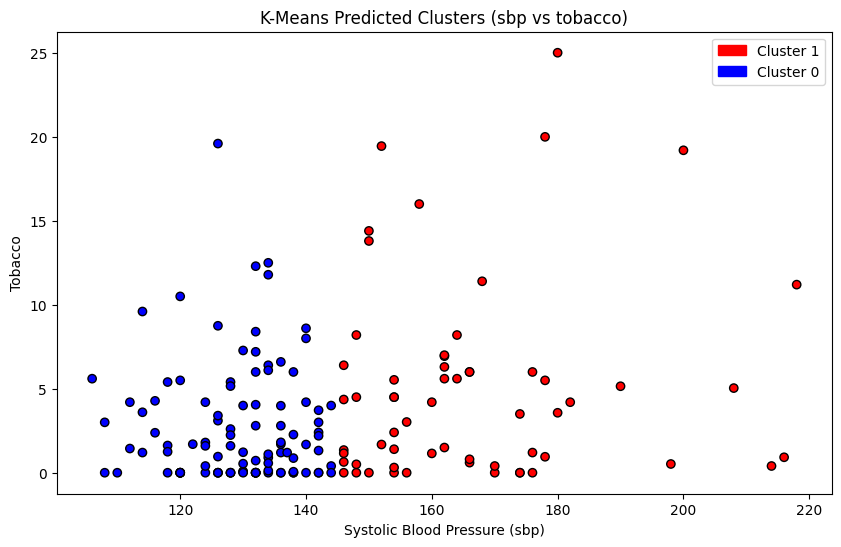

In [16]:
import matplotlib.patches as mpatches
# Visualization
plt.figure(figsize=(10, 6))
colors = ['red' if label == 1 else 'blue' for label in y]
plt.scatter(X['sbp'], X['tobacco'], c=colors, edgecolor='k', label='Actual CHD status')
plt.title('Actual CHD Status (sbp vs tobacco)')
plt.xlabel('Systolic Blood Pressure (sbp)')
plt.ylabel('Tobacco')
red_patch = mpatches.Patch(color='red', label='CHD Present')
blue_patch = mpatches.Patch(color='blue', label='CHD Absent')
plt.legend(handles=[red_patch, blue_patch], loc='upper right')
plt.show()

plt.figure(figsize=(10, 6))
cluster_colors = ['blue' if cluster == 0 else 'red' for cluster in test_clusters]
plt.scatter(X_test['sbp'], X_test['tobacco'], c=cluster_colors, edgecolor='k', label='Predicted Cluster')
plt.title('K-Means Predicted Clusters (sbp vs tobacco)')
plt.xlabel('Systolic Blood Pressure (sbp)')
plt.ylabel('Tobacco')
red_patch = mpatches.Patch(color='red', label='Cluster 1')
blue_patch = mpatches.Patch(color='blue', label='Cluster 0')
plt.legend(handles=[red_patch, blue_patch], loc='upper right')
plt.show()

In [17]:
from sklearn.neighbors import KNeighborsClassifier
# Split the data into training and test sets
X_train = data[['sbp', 'tobacco']].iloc[:300]  # Training features
y_train = data['chd'].iloc[:300]  # Training labels
X_test = data[['sbp', 'tobacco']].iloc[300:]  # Test features
y_test = data['chd'].iloc[300:]  # Test labels

# Initialize the 1-Nearest Neighbor classifier
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5617283950617284


In [18]:
from scipy.spatial import distance
# Assuming 'data' is your DataFrame loaded from the dataset URL
X_train = data[['sbp', 'tobacco']].iloc[:300]
y_train = data['chd'].iloc[:300]
X_test = data[['sbp', 'tobacco']].iloc[300:]
y_test = data['chd'].iloc[300:]

# DBScan clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Example parameters
dbscan.fit(X_train)

# Predict clusters (training data)
train_labels = dbscan.labels_

# Handle outliers: Assign to nearest cluster or a new label
# Here, we simply assign outliers to the nearest cluster for simplicity
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
unique_labels = set(train_labels) - {-1}

# Assigning cluster labels based on majority 'chd' status within each cluster
clusters_to_chd = {}
for label in unique_labels:
    mask = (train_labels == label)
    cluster_chd = y_train[mask]
    if len(cluster_chd) > 0:
        majority_chd = cluster_chd.mode()[0]
        clusters_to_chd[label] = majority_chd
    else:
        clusters_to_chd[label] = 0  # Default/fallback assignment

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv'
data = pd.read_csv(url)

# Assuming 'data' is your DataFrame loaded from the dataset URL
X = data[['sbp', 'tobacco']]
y = data['chd']

# Standardizing features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train_scaled = X_scaled[:300]
y_train = y[:300]
X_test_scaled = X_scaled[300:]
y_test = y[300:]


In [20]:
# Apply K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_scaled)

# Predict clusters (treat cluster labels as binary labels for simplicity)
y_pred_kmeans = kmeans.predict(X_test_scaled)

# Map K-Means labels to match with 'chd' labels for accuracy calculation
# This step might require manual label mapping based on understanding the cluster assignments
# For simplicity, assuming direct comparison here
accuracy_kmeans = accuracy_score(y_test, y_pred_kmeans)
print(f'K-Means Accuracy: {accuracy_kmeans}')


K-Means Accuracy: 0.7160493827160493


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
# Apply K-Nearest Neighbors as a classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict 'chd' status
y_pred_knn = knn.predict(X_test_scaled)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn}')


KNN Accuracy: 0.6481481481481481


In [ ]:
# Q1:
# Silhouette Score: Measures how well each data point fits within its cluster compared to other clusters, applicable to all three algorithms.

# Number of Noise Points (specific to DBSCAN): Indicates the algorithm's ability to handle outliers, with fewer noise points generally indicating
#  better performance.

# Cluster Stability: Assesses how consistent the clustering results are when the data or algorithm parameters are slightly modified,
# relevant for NN and DBSCAN due to their sensitivity to dataset specifics.

In [23]:
# Q2:
# Evaluating the Performance of Three Algorithms in Lab 3:
# The performance of the clustering algorithms (k-means, Nearest Neighbor clustering, and DBScan) in lab 3 can be evaluated using several
# other methods or perspectives:

# Convergence Time or Number of Iterations to Converge (Q4, Q5): Evaluating how quickly an algorithm converges to a stable solution can be an
# indicator of its efficiency, especially for larger datasets.

# Cluster Cohesion and Separation (Part of Q11): You can evaluate the algorithms based on how well they group similar instances together (cohesion)
# and keep different instances apart (separation), which can be quantified using some of the metrics mentioned above like the Silhouette Score or
# Davies-Bouldin Index.

# Plot Visualizations (Q3, Q7, Q8, Q10, Q13, Q14): Visual inspection of the clustering results through plots can provide insights into the patterns
# recognized by each algorithm and how well they match with the expected outcomes or known labels.

# Robustness to Noise and Outliers (Part of Q15 and during DBScan application): The ability of an algorithm to handle noise and outliers effectively
#  without significant degradation in clustering quality can be an important performance aspect, especially for real-world datasets.

# Scalability and Computational Complexity: Considering the algorithms' performance on bigger datasets or under different complexity scenarios can
# provide insights into their scalability and suitability for large-scale applications.